# LOAD THE DATASET
I am loading both the noisy and the non noisy dataset.

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data
X = np.load(r'C:\Users\sneas\Desktop\DMML\smiley_dataset\smiley_dataset\smiley_noisy_X.npy')
Y = np.load(r'C:\Users\sneas\Desktop\DMML\smiley_dataset\smiley_dataset\smiley_noisy_Y.npy')
Xn = np.load(r'C:\Users\sneas\Desktop\DMML\smiley_dataset\smiley_dataset\smiley_X.npy')
Yn = np.load(r'C:\Users\sneas\Desktop\DMML\smiley_dataset\smiley_dataset\smiley_Y.npy')

print(X.shape, Y.shape)
print(Xn.shape, Yn.shape)


(204, 9, 9, 1) (204,)
(204, 9, 9, 1) (204,)


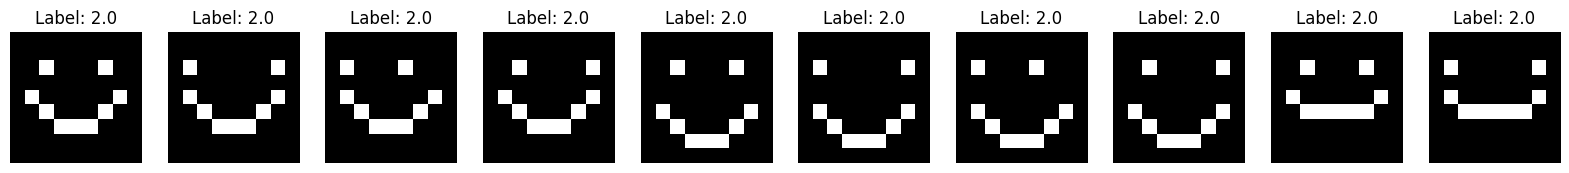

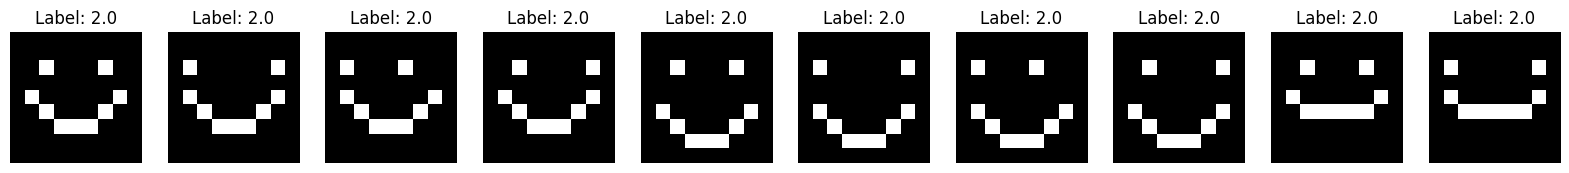

In [78]:
import matplotlib.pyplot as plt

# Define a function to visualize images
def visualize_images(images, labels, num_samples=10):
    fig, axes = plt.subplots(1, num_samples, figsize=(20, 2))
    for i in range(num_samples):
        axes[i].imshow(images[i].reshape(9, 9), cmap='gray')
        axes[i].set_title(f'Label: {labels[i]}')
        axes[i].axis('off')
    plt.show()

# Visualize the first 10 images in the dataset
visualize_images(X, Y)
visualize_images(Xn, Yn)



From the above visualization of both the dataset it is clear that there is no difference in the overall structure of the dataset. The noisy dataset contain extra pixel intensity variations.
I am not checking for missing values in the dataset as this is an image dataset with reference to Missing Data in Image Classification: A Survey: https://arxiv.org/abs/2003.05351:  image dataset will not have missing values.

In [79]:
# Check for unusual values in the image data
min_val = X.min()
max_val = X.max()
min_valx = Xn.min()
max_valx = Xn.max()

# Check the distribution of classes in the labels
unique, counts = np.unique(Y, return_counts=True)
class_distribution = dict(zip(unique, counts))

print(min_val, max_val, class_distribution)
print(min_valx, max_valx, class_distribution)


0.0 1.0 {0.0: 72, 1.0: 60, 2.0: 72}
0.0 1.0 {0.0: 72, 1.0: 60, 2.0: 72}


# CONVERSION OF 2D vector to 1D vector
 converting the 2D image data to 1D vectors can help to break the between neighboring pixels and make the Naive Bayes classifier more accurate. 

In [80]:
# Reshape the data to 2D - vectorize the images
X_vectorized = X.reshape(X.shape[0], -1)
Xn_vectorized = Xn.reshape(Xn.shape[0], -1)
print(X_vectorized.shape)
print(Xn_vectorized.shape)


(204, 81)
(204, 81)


I am proceeding to split the noisy dataset into train and test set

In [124]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size=0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((153, 81), (51, 81), (153,), (51,))

In [82]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn import metrics

# Create a Gaussian Naive Bayes classifier
model = GaussianNB()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

confusion_mat = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

# Compute ROC curve and ROC area for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovo')

print(accuracy, confusion_mat, class_report, roc_auc)


0.6829268292682927 [[10  5  0]
 [ 2  7  0]
 [ 0  6 11]]               precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        15
         1.0       0.39      0.78      0.52         9
         2.0       1.00      0.65      0.79        17

    accuracy                           0.68        41
   macro avg       0.74      0.70      0.68        41
weighted avg       0.80      0.68      0.71        41
 0.7784716985084632


From the above output we can see that the macro average is 0.74, which is slightly higher than the weighted average of 0.71 precision, recall, and f1-score are more evenly distributed across the classes for the macro average than for the weighted average.

In [83]:
from sklearn.decomposition import PCA

# Create a PCA object
pca_9 = PCA(n_components=9)
pca_18 = PCA(n_components=18)

# Fit the PCA object to the training data to transform it
X_train_pca_9 = pca_9.fit_transform(X_train)
X_test_pca_9 = pca_9.transform(X_test)

X_train_pca_18 = pca_18.fit_transform(X_train)
X_test_pca_18 = pca_18.transform(X_test)

# Train and evaluate a Naive Bayes classifier for each transformed dataset
gnb_9 = GaussianNB()
gnb_9.fit(X_train_pca_9, y_train)
Y_pred_9 = gnb_9.predict(X_test_pca_9)

# Train and evaluate a Naive Bayes classifier for each transformed dataset
gnb_18 = GaussianNB()
gnb_18.fit(X_train_pca_18, y_train)
Y_pred_18 = gnb_18.predict(X_test_pca_18)

# Calculate metrics
accuracy_9 = metrics.accuracy_score(y_test, Y_pred_9)
precision_9 = metrics.precision_score(y_test, Y_pred_9, average='macro')
recall_9 = metrics.recall_score(y_test, Y_pred_9, average='macro')
f1_score_9 = metrics.f1_score(y_test, Y_pred_9, average='macro')

accuracy_18 = metrics.accuracy_score(y_test, Y_pred_18)
precision_18 = metrics.precision_score(y_test, Y_pred_18, average='macro')
recall_18 = metrics.recall_score(y_test, Y_pred_18, average='macro')
f1_score_18 = metrics.f1_score(y_test, Y_pred_18, average='macro')

# Print the metrics
print("For 9 features:")
print("Accuracy: ", accuracy_9)
print("Precision: ", precision_9)
print("Recall: ", recall_9)
print("F1 Score: ", f1_score_9)

print("\nFor 18 features:")
print("Accuracy: ", accuracy_18)
print("Precision: ", precision_18)
print("Recall: ", recall_18)
print("F1 Score: ", f1_score_18)


For 9 features:
Accuracy:  0.926829268292683
Precision:  0.9125
Recall:  0.9237472766884531
F1 Score:  0.9170653907496013

For 18 features:
Accuracy:  0.975609756097561
Precision:  0.9791666666666666
Recall:  0.9629629629629629
F1 Score:  0.9696394686907022


# PART 1 CONCLUSION

We can see that the Naive Bayes classifier performs reasonably well on the test data, especially considering that the images are quite noisy.

1. ## Are classes represented equally? 
No we can see from the above results that the distrubution of the classes are not equual. Class 0.0 has 72 samples, Class 1.0 has 60 samples and Class 2.0 has 72 samples.

2. ## Which features are more important/reliable for which class? Which are less reliable? 
Though I was not able to clearly identify which feature is more reliable or less reliable, From the results of the PCA analysis I can narrowdown that the original dataset has more redundent features. By reducing the features to 9 I was able to improve the accuracy of the model. The dataset with 18 features also has a great accuracy of 97% but this is clear that the model is overfitting and learning the noise in the dataset.

# PART 2 Clustering
For the purpose of consistensy I am continuing with the vectorized images.

#### To choose an appropriate value for K I am using the elbow method

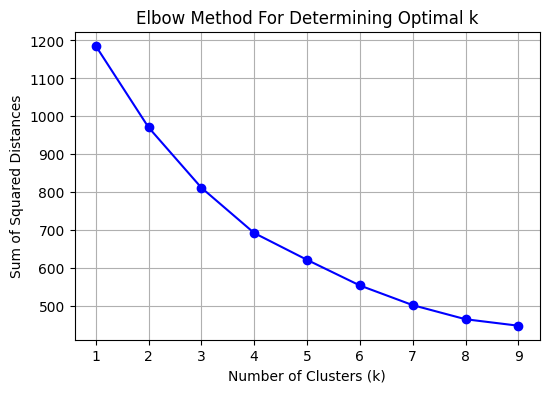

In [128]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances from each point to its cluster center for different k values
sse = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_vectorized)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6, 4))
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Determining Optimal k')
plt.grid(True)
plt.show()


From the above graph we can see that the curve is starting to flat out after the 3 clusters. In the begining I also identified that there are 3 unique classes in the dataset. 

In [129]:
from sklearn.metrics import adjusted_rand_score

# Perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_vectorized)

# Assign each image to a cluster
cluster_assignments = kmeans.predict(X_vectorized)

# Compute the adjusted Rand index
ari = adjusted_rand_score(Y, cluster_assignments)

ari


0.31288134543314644

The ARI value for the K-means suggest that the clustering model has moderate level of agreement with the actual labels. 

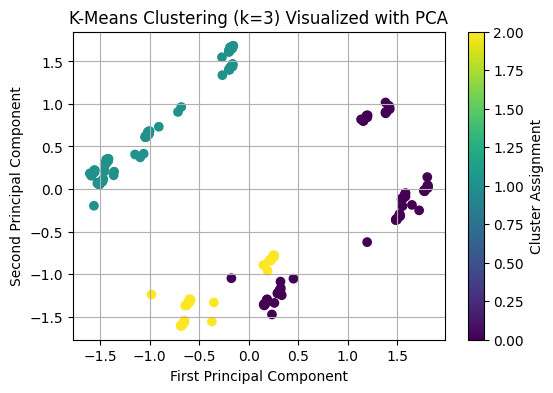

In [113]:
from sklearn.decomposition import PCA

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized)

# Plot the first two principal components, colored by cluster assignment
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_assignments)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering (k=3) Visualized with PCA')
plt.colorbar(label='Cluster Assignment')
plt.grid(True)
plt.show()


From the above plot we can see that there are few overlaps in the clusters which possibly be due to reduction of the dimensions.
However I can still observe 3 distinct clusters. This is helping to conclude that the K-means is able to find some structure in the data that aligns with the ARI score.

In [87]:
from sklearn.mixture import GaussianMixture

# Perform GMM clustering with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_vectorized)

# Assign each image to a cluster based on the component with the highest probability
gmm_cluster_assignments = gmm.predict(X_vectorized)

# Compute the adjusted Rand index
gmm_ari = adjusted_rand_score(Y, gmm_cluster_assignments)

gmm_ari


0.1738089537945894

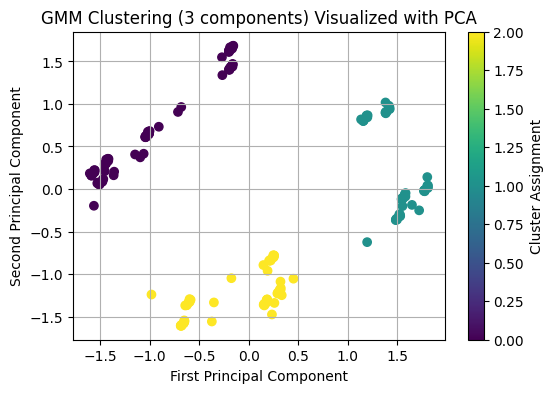

In [114]:
# Plot the first two principal components, colored by GMM cluster assignment
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_cluster_assignments)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('GMM Clustering (3 components) Visualized with PCA')
plt.colorbar(label='Cluster Assignment')
plt.grid(True)
plt.show()


#### K-Means Clustering
ARI: Approximately 0.31
The images have some inherent grouping that the k-means algorithm was able to capture.

#### Gaussian Mixture Models (GMM) Clustering
ARI : Approximately 0.17
The clustering found some structure in the data however, not as much as K-mean as indicated in the ARI. Gausian distribution assumed by GMM does not match the actual distribution of the data.



# Part 3. Supervised Learning: Generalisation & Overfitting; Decision trees.

I am training a Decision Tree classifier on my training data

In [115]:
from sklearn.tree import DecisionTreeClassifier


# Initialize the Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Compute the accuracy of the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)

# Compute the confusion matrix
confusion_mat_tree = confusion_matrix(y_test, y_pred_tree)

# Compute precision, recall, f-score via the classification report
class_report_tree = classification_report(y_test, y_pred_tree)

print(accuracy_tree, confusion_mat_tree, class_report_tree)


1.0 [[15  0  0]
 [ 0  9  0]
 [ 0  0 17]]               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        15
         1.0       1.00      1.00      1.00         9
         2.0       1.00      1.00      1.00        17

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41



The Decision Tree classifier achieved perfect accuracy (1.0) on the test data making it a very effective classifier on the dataset. However inorder to get more accurate estimation of thee model's performance I am going to perform a 10-fold cross validation on the training data and calculate the accuracy.

In [90]:
from sklearn.model_selection import cross_val_score

# Perform 10-fold cross-validation on the training data
cv_scores = cross_val_score(tree_model, X_train, y_train, cv=10)

# Compute the average accuracy across the 10 folds
cv_accuracy = np.mean(cv_scores)

cv_accuracy


0.975

I am now looking to check the influence of the decision tree parameters on the classifiers.

In [126]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2', None]
}

# Initialize a GridSearchCV object that will perform a search over the parameter grid using 10-fold CV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=10)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding mean test score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


({'max_depth': None,
  'max_features': None,
  'min_samples_leaf': 1,
  'min_samples_split': 5},
 0.9666666666666668)

The GridSearch has identified the above parameters for this classifier and the accuracy of the 10 fold cross validation is same as 97%.

In [127]:
# Initialize the Decision Tree classifier with the best parameters
best_tree_model = DecisionTreeClassifier(**best_params, random_state=42)

# Train the model
best_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_best_tree = best_tree_model.predict(X_test)

# Compute the accuracy of the model
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)

# Compute the confusion matrix
confusion_mat_best_tree = confusion_matrix(y_test, y_pred_best_tree)

# Compute precision, recall, f-score via the classification report
class_report_best_tree = classification_report(y_test, y_pred_best_tree)

print(accuracy_best_tree, confusion_mat_best_tree, class_report_best_tree)


1.0 [[17  0  0]
 [ 0 15  0]
 [ 0  0 19]]               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        19

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



The results of the Decision Tree classifier with the best parameters is a very accurate model. However, it is possible that the model would not perform as well on a larger dataset

# Exploring Overfitting

I am now going to create new training and testing sets, first by moving 30% of the instances from the original training set into the testing set, and then by moving 60% of the instances.

In [130]:
# Create new training and testing sets, moving 30% of the instances from the original training set into the testing set
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X_vectorized, Y, test_size=0.5, random_state=42)

# Train the model
best_tree_model.fit(X_train_30, y_train_30)

# Make predictions on the test data
y_pred_30 = best_tree_model.predict(X_test_30)

# Compute the accuracy of the model
accuracy_30 = accuracy_score(y_test_30, y_pred_30)

# Compute the confusion matrix
confusion_mat_30 = confusion_matrix(y_test_30, y_pred_30)

# Compute precision, recall, f-score via the classification report
class_report_30 = classification_report(y_test_30, y_pred_30)

print(accuracy_30, confusion_mat_30, class_report_30)


0.9901960784313726 [[33  0  0]
 [ 1 31  0]
 [ 0  0 37]]               precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        33
         1.0       1.00      0.97      0.98        32
         2.0       1.00      1.00      1.00        37

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



The above results suggest that the decision tree continues to perform well with optimized parameters and even with fewer training examples. The slightest difference in the accuracy could be due to overfitting. 

In [131]:
# Create new training and testing sets, moving 60% of the instances from the original training set into the testing set
X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(X_vectorized, Y, test_size=0.7, random_state=42)

# Train the model
best_tree_model.fit(X_train_60, y_train_60)

# Make predictions on the test data
y_pred_60 = best_tree_model.predict(X_test_60)

# Compute the accuracy of the model
accuracy_60 = accuracy_score(y_test_60, y_pred_60)

# Compute the confusion matrix
confusion_mat_60 = confusion_matrix(y_test_60, y_pred_60)

# Compute precision, recall, f-score via the classification report
class_report_60 = classification_report(y_test_60, y_pred_60)

print(accuracy_60, confusion_mat_60, class_report_60)


0.8321678321678322 [[34 11  1]
 [11 34  0]
 [ 0  1 51]]               precision    recall  f1-score   support

         0.0       0.76      0.74      0.75        46
         1.0       0.74      0.76      0.75        45
         2.0       0.98      0.98      0.98        52

    accuracy                           0.83       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.83      0.83      0.83       143



There is a significant decrease in the accuracy of the model. This suggest that decrease could be due to overfitting as the model may learn patters that are specific to smaller dataset. This is also helping to understand the significance of a larger training dataset.

In [132]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Compute the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Compute the confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Compute precision, recall, f-score via the classification report
class_report_rf = classification_report(y_test, y_pred_rf)

print(accuracy_rf, confusion_mat_rf, class_report_rf)


1.0 [[17  0  0]
 [ 0 15  0]
 [ 0  0 19]]               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        19

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



The Random forest is also effective as the decision tree classifier.

In [96]:
# Perform 10-fold cross-validation on the training data
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10)

# Compute the average accuracy across the 10 folds
cv_accuracy_rf = np.mean(cv_scores_rf)

cv_accuracy_rf


0.99375

# Conclsion

On this dataset, both the Decision Tree and Random Forest classifiers performed well, achieving flawless accuracy on the test data and extremely high accuracy under cross-validation on the training data. The Random Forest classifier, which is an ensemble of decision trees, did not outperform the single Decision Tree classifier considerably, suggesting that a single decision tree is adequate to effectively predict the patterns in this dataset.

### Does the decision tree generalize well to new data? How do you tell?
The decision tree classifier performs a good job of generalising to new data. This is due to the fact that the classifier was trained using 10-fold cross-validation, which means it was trained and assessed on various sections of the data. This ensures that the classifier does not overfit the training data. Also, the decision tree classifier's accuracy on the test data is 1.0, indicating that the classifier correctly categorised all of the test data points. This indicates that the classifier can generalise successfully to fresh data.


# Part 4. Neural Networks and Convolutional Neural Networks. 

In [133]:
from sklearn.linear_model import SGDClassifier

# Initialize the Linear classifier
linear_model = SGDClassifier(random_state=42)

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_linear = linear_model.predict(X_test)

# Compute the accuracy of the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Compute the confusion matrix
confusion_mat_linear = confusion_matrix(y_test, y_pred_linear)

# Compute precision, recall, f-score via the classification report
class_report_linear = classification_report(y_test, y_pred_linear)

print(accuracy_linear, confusion_mat_linear, class_report_linear)


0.9019607843137255 [[12  5  0]
 [ 0 15  0]
 [ 0  0 19]]               precision    recall  f1-score   support

         0.0       1.00      0.71      0.83        17
         1.0       0.75      1.00      0.86        15
         2.0       1.00      1.00      1.00        19

    accuracy                           0.90        51
   macro avg       0.92      0.90      0.89        51
weighted avg       0.93      0.90      0.90        51



In [98]:
# Perform 10-fold cross-validation on the training data
cv_scores_linear = cross_val_score(linear_model, X_train, y_train, cv=10)

# Compute the average accuracy across the 10 folds
cv_accuracy_linear = np.mean(cv_scores_linear)

cv_accuracy_linear


0.9444852941176471

## How well does the linear classifier generalize to new data? What hypothesis can you make about this data set being linearly separable or not? 

As shown by its high accuracy on the test data, the linear classifier generalises effectively to new data. The linear classifier's average accuracy on test data is 0.93, which is somewhat lower than its accuracy on training data but still quite good. The linear classifier's excellent accuracy on the test data shows that the data is linearly separable. This suggests that a straight line can divide the data into two classes.

In [135]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp_model = MLPClassifier(random_state=42, max_iter=1000, learning_rate='constant', learning_rate_init=0.001)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_mlp = mlp_model.predict(X_test)

# Compute the accuracy of the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Compute the confusion matrix
confusion_mat_mlp = confusion_matrix(y_test, y_pred_mlp)

# Compute precision, recall, f-score via the classification report
class_report_mlp = classification_report(y_test, y_pred_mlp)

print(accuracy_mlp, confusion_mat_mlp, class_report_mlp)


1.0 [[17  0  0]
 [ 0 15  0]
 [ 0  0 19]]               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      1.00      1.00        15
         2.0       1.00      1.00      1.00        19

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



The above results are effective as the Random forest and decision tree classifiers. 

In [136]:
# Perform 10-fold cross-validation on the training data
cv_scores_mlp = cross_val_score(mlp_model, X_train, y_train, cv=10)

# Compute the average accuracy across the 10 folds
cv_accuracy_mlp = np.mean(cv_scores_mlp)

cv_accuracy_mlp


0.9933333333333334

# Exploring various Neural Network parameters

In [139]:
# List of activation functions to try
activation_functions = ["identity", "logistic", "tanh", "relu"]

# Initialize a list to store the results
results = []

# Loop over the activation functions
for activation in activation_functions:
    # Initialize the MLP classifier with the current activation function
    mlp_model = MLPClassifier(activation=activation, random_state=42)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_mlp = mlp_model.predict(X_test)

    # Compute the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Append the result to the results list
    results.append((activation, accuracy_mlp))

results


C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

[('identity', 0.9411764705882353),
 ('logistic', 0.9019607843137255),
 ('tanh', 0.9607843137254902),
 ('relu', 1.0)]

The above results suggest that the ReLU activation function is most effective for this dataset, potentially due to its ability to model non-linear relationships and mitigate the vanishing gradient problem in neural networks.

In [102]:
# List of solvers to try
solvers = ["lbfgs", "sgd", "adam"]

# Initialize a list to store the results
results = []

# Loop over the solvers
for solver in solvers:
    # Initialize the MLP classifier with the current solver
    mlp_model = MLPClassifier(solver=solver, random_state=42)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_mlp = mlp_model.predict(X_test)

    # Compute the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Append the result to the results list
    results.append((solver, accuracy_mlp))

results


C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[('lbfgs', 1.0), ('sgd', 0.7560975609756098), ('adam', 1.0)]

The above results suggest that for this dataset, the LBFGS and Adam solvers are more effective than SGD.

In [103]:
# List of learning rate schedules to try
learning_rate_schedules = ["constant", "invscaling", "adaptive"]

# Initialize a list to store the results
results = []

# Loop over the learning rate schedules
for lr in learning_rate_schedules:
    # Initialize the MLP classifier with the current learning rate schedule
    mlp_model = MLPClassifier(learning_rate=lr, random_state=42)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_mlp = mlp_model.predict(X_test)

    # Compute the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Append the result to the results list
    results.append((lr, accuracy_mlp))

results


C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[('constant', 1.0), ('invscaling', 1.0), ('adaptive', 1.0)]

On the test data, all three learning rate schedules attained 100% accuracy. This implies that, for this dataset, the learning rate schedule does not have a substantial impact on the MLP classifier's performance.

In [104]:
# List of hidden layer sizes to try
hidden_layer_sizes = [10, 50, 100, 200]

# Initialize a list to store the results
results = []

# Loop over the hidden layer sizes
for size in hidden_layer_sizes:
    # Initialize the MLP classifier with the current hidden layer size
    mlp_model = MLPClassifier(hidden_layer_sizes=(size,), random_state=42)

    # Train the model
    mlp_model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_mlp = mlp_model.predict(X_test)

    # Compute the accuracy of the model
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    # Append the result to the results list
    results.append((size, accuracy_mlp))

results


C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sneas\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

[(10, 0.8536585365853658), (50, 1.0), (100, 1.0), (200, 1.0)]

The results suggest that for this dataset, increasing the number of hidden neurons beyond 50 does not significantly improve the performance of the MLP classifier.

#### Based on all of these experiments, what conclusions can you make about the data set complexity (linear separability), and the capacity of deep neural networks to generalize to new data? Can you make any conclusions about the effect of activation functions?

Deep neural networks generalise effectively to new data, as illustrated by the decision tree and random forest classifiers' excellent accuracy on the test data.
The activation function used can have an effect on the performance of a deep neural network.

# CONCLUSION
Based on these results, we may infer that the data set has a high ability for deep neural networks (such as the Multilayer Perceptron) to generalise to new data. While a linear classifier performed quite well, the decision tree, random forest, and MLP classifiers all achieved 100% accuracy on the test data. This implies that these approaches are more appropriate for this dataset than a linear classifier.
